In [1]:
import yfinance as yf

ticker = "AAPL"  
data = yf.download(ticker, start="2014-09-28", end="2024-09-28")

print(data.head())

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2014-09-29  24.662500  25.110001  24.657499  25.027500  22.222095  199065200
2014-09-30  25.202499  25.385000  25.132500  25.187500  22.364164  221056400
2014-10-01  25.147499  25.172501  24.674999  24.795000  22.015656  205965200
2014-10-02  24.817499  25.055000  24.510000  24.975000  22.175482  191031200
2014-10-03  24.860001  25.052500  24.760000  24.905001  22.113329  173878400


In [2]:
data['Adj Close'] = data['Adj Close'].fillna(method='ffill')  # Fill any missing values
data['Returns'] = data['Adj Close'].pct_change().dropna()
data = data.dropna()
print(data[['Adj Close', 'Returns']].head())

            Adj Close   Returns
Date                           
2014-09-30  22.364164  0.006393
2014-10-01  22.015656 -0.015583
2014-10-02  22.175482  0.007260
2014-10-03  22.113329 -0.002803
2014-10-06  22.113329  0.000000


/tmp/ipykernel_416991/26029378.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Adj Close'] = data['Adj Close'].fillna(method='ffill')  # Fill any missing values


In [4]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.8/161.8 kB 2.5 MB/s eta 0:00:00 0:00:01


In [5]:
import numpy as np
from hmmlearn import hmm

returns = data['Returns'].values.reshape(-1, 1)

n_states = 2  
model = hmm.GaussianHMM(n_components=n_states, covariance_type='full', n_iter=1000)
model.fit(returns)

hidden_states = model.predict(returns)
data['Hidden States'] = hidden_states
print(data[['Returns', 'Hidden States']].head())

             Returns  Hidden States
Date                               
2014-09-30  0.006393              1
2014-10-01 -0.015583              1
2014-10-02  0.007260              1
2014-10-03 -0.002803              1
2014-10-06  0.000000              1


/tmp/ipykernel_416991/1105905063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hidden States'] = hidden_states


In [6]:
for i in range(n_states):
    print(f"State {i} Mean: {model.means_[i][0]}, Variance: {model.covars_[i][0][0]}")

State 0 Mean: -0.0001282937722141631, Variance: 0.0008857533178238654
State 1 Mean: 0.001484152149534816, Variance: 0.00014767733924982734


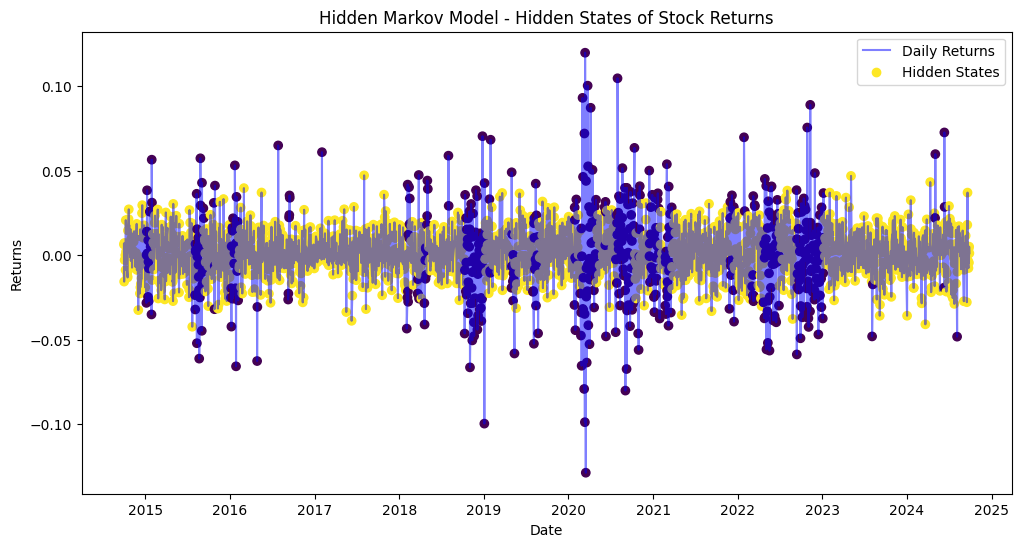

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Returns'], label='Daily Returns', color='blue', alpha=0.5)
plt.scatter(data.index, data['Returns'], c=data['Hidden States'], cmap='viridis', label='Hidden States', marker='o')
plt.title('Hidden Markov Model - Hidden States of Stock Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [8]:
transition_matrix = model.transmat_
print("Transition Matrix:")
print(transition_matrix)

Transition Matrix:
[[0.88926318 0.11073682]
 [0.03627342 0.96372658]]


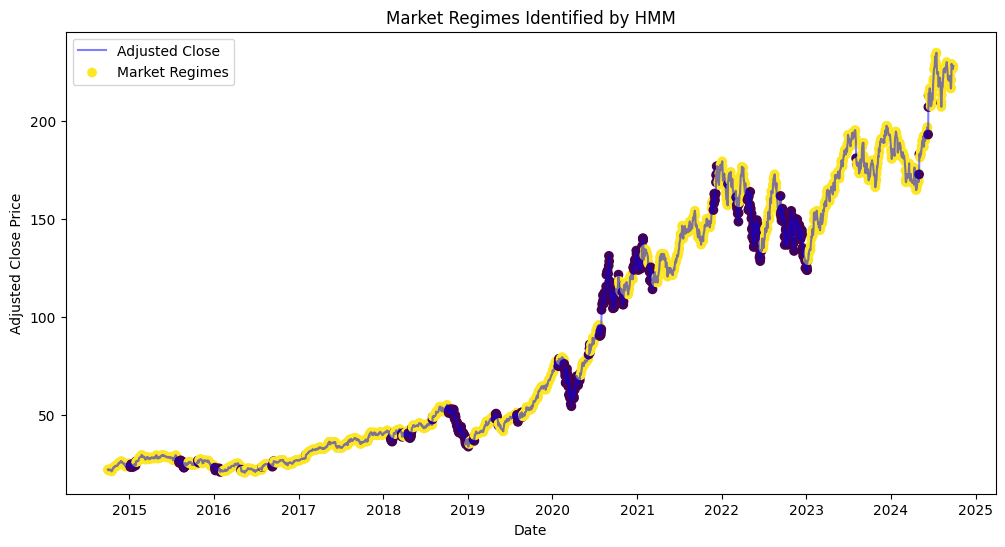

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'], label='Adjusted Close', color='blue', alpha=0.5)
plt.scatter(data.index, data['Adj Close'], c=data['Hidden States'], cmap='viridis', label='Market Regimes', marker='o')
plt.title('Market Regimes Identified by HMM')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

In [10]:
current_state = data['Hidden States'].iloc[-1]
predicted_future_state = np.argmax(transition_matrix[current_state])
print(f"Predicted Future State: {predicted_future_state}")

Predicted Future State: 1
